환경 설정

In [ ]:
# %pip install -q python-dotenv langchain-openai

Note: you may need to restart the kernel to use updated packages.


In [1]:
from dotenv import load_dotenv

load_dotenv()

True

랭체인

In [2]:
from langchain_openai import ChatOpenAI

query = '인프런에는 어떤 강의가 있나요?'

llm = ChatOpenAI(model='gpt-4o-mini')
llm.invoke(query)

AIMessage(content='인프런은 다양한 주제의 온라인 강의를 제공하는 플랫폼입니다. 주로 다음과 같은 분야의 강의가 있습니다:\n\n1. **프로그래밍**: Python, Java, JavaScript, C++, Ruby 등 다양한 프로그래밍 언어와 관련된 강의.\n2. **웹 개발**: HTML, CSS, React, Vue.js, Node.js 등을 포함한 프론트엔드 및 백엔드 개발 강의.\n3. **데이터 과학**: 데이터 분석, 머신러닝, 인공지능, 데이터 시각화 관련 강의.\n4. **모바일 앱 개발**: iOS 및 Android 앱 개발 관련 강의.\n5. **디자인**: UI/UX 디자인, 그래픽 디자인, Adobe Photoshop, Illustrator 등의 강의.\n6. **기타**: 클라우드 컴퓨팅, DevOps, 사이버 보안, 블록체인 등 다양한 최신 기술 관련 강의.\n\n각 강의는 강사에 의해 진행되며, 수강생들은 자신의 수준에 맞는 강의를 선택할 수 있습니다. 추가적인 정보나 특정 강의에 대한 자세한 내용은 인프런 웹사이트를 방문하여 확인할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 253, 'prompt_tokens': 18, 'total_tokens': 271, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_29330a9688', 'finish_re

랭그래프

개념 정리

- State: 상태 → 현재 Agent 상태
- Node: Agent가 수행하는 작업 → 함수 ∙ 에이전트
- (Conditional)Edge: 필요할 때만, Rewrite 가능

In [3]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    message: list[Annotated[AnyMessage, add_messages]]
    
# AnyMessage → [SystemMessage ∙ HumanMessage ∙ AIMessage]을 add_message을 통해 message에 추가

Node는 작업이고, Edge는 연결 → Node가 생성된 이후여야 Edging이 가능함

In [4]:
from langgraph.graph import StateGraph
 
graph_builder = StateGraph(AgentState)

노드 생성

In [5]:
def generate(state: AgentState) -> AgentState:
    message = state['message']
    ai_message = llm.invoke(message)
    return {'message': [ai_message]} #  위에서 message는 리스트로, {'message': [ai_message]}로 감싸서 반환해야함

엣징

In [6]:
from langgraph.graph import START, END

graph_builder.add_node('generate', generate)

graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [7]:
graph = graph_builder.compile()

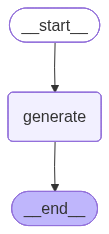

In [8]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))


In [9]:
from langchain_core.messages import HumanMessage

initial_state = {'message': [HumanMessage(query)]}
graph.invoke(initial_state)

{'message': [AIMessage(content='인프런은 다양한 주제의 온라인 강의를 제공하는 플랫폼입니다. 주로 IT, 프로그래밍, 데이터 과학, 디자인, 마케팅 등 여러 분야의 강의를 찾을 수 있습니다. 예를 들어, 다음과 같은 강의 카테고리가 있습니다:\n\n1. **프로그래밍**: Python, Java, JavaScript, C++, Ruby 등의 언어 강의.\n2. **웹 개발**: HTML, CSS, React, Vue.js, Node.js 등을 포함한 웹 기술 강의.\n3. **모바일 개발**: iOS, Android 앱 개발 관련 강의.\n4. **데이터 과학**: 데이터 분석, 머신러닝, 인공지능 관련 강의.\n5. **디자인**: UI/UX 디자인, 그래픽 디자인, 포토샵, 일러스트레이터 강의.\n6. **마케팅**: 디지털 마케팅, SEO, 콘텐츠 마케팅 관련 강의.\n7. **DevOps**: 클라우드 컴퓨팅, CI/CD, Docker, Kubernetes 관련 강의.\n\n각 강의는 강사에 따라 다르며, 초급부터 고급 과정까지 다양하게 제공됩니다. 인프런의 웹사이트에서 원하는 주제를 검색하거나 카테고리를 탐색하여 강의를 찾을 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 273, 'prompt_tokens': 18, 'total_tokens': 291, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'sy

START - generate - END